In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scikitplot as skplt
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt
from scikitplot.estimators import plot_learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("C:/Users/edenl/Desktop/file_rouge/notebook/original_data/clean_heart_failure_data.csv")
df

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,12,1,1,41,147,0,1,98,0,10,2,0
1,1,21,0,2,55,40,0,1,82,0,20,1,1
2,2,9,1,1,31,141,0,2,25,0,10,2,0
3,3,20,0,0,39,72,0,1,34,1,25,1,1
4,4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,913,17,1,3,14,122,0,1,58,0,22,1,1
914,914,40,1,0,45,51,1,1,67,0,42,1,1
915,915,29,1,0,31,9,0,1,41,1,22,1,1
916,916,29,0,1,31,94,0,0,100,0,10,1,1


In [4]:
df = df.drop("Unnamed: 0" , axis=1)

In [5]:
X = df.drop(["HeartDisease" ], axis=1)
# X is the dataframe without the target 

y = df.HeartDisease

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#we are splitting the dataset with train test split a test size of 20 percent of test and 80 percent of train 


In [7]:
preprocessing_sm = SMOTE(sampling_strategy='auto')


In [8]:

preprocessing_ss = Pipeline(steps=[
    ('standard scaler', StandardScaler())])

model_log = linear_model.LogisticRegression( C=0.1 , solver='lbfgs')
model_knn = KNeighborsClassifier()

model_rfc = RandomForestClassifier()

accuracy train : 1.000
accuracy test : 0.891
[0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]


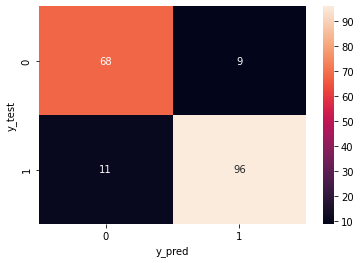

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.91      0.90      0.91       107

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

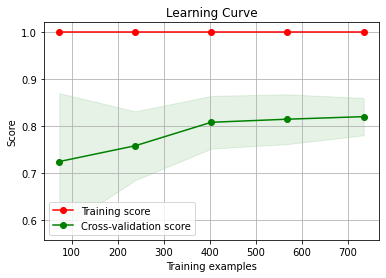

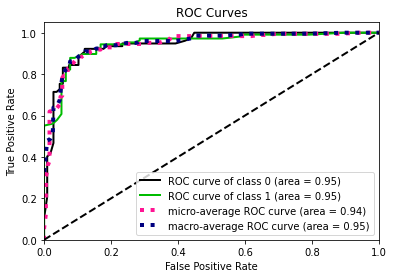

In [12]:

pipeline_rfc = Pipeline(steps = [ ['standard scaler' , preprocessing_ss],
                                ['RandomForestClassifier', model_rfc]
                                     ])
pipeline_rfc.fit(X_train , y_train)
print("accuracy train : %.3f"%pipeline_rfc.score(X_train , y_train))
print("accuracy test : %.3f"%pipeline_rfc.score(X_test , y_test))
y_pred_rfc = pipeline_rfc.predict(X_test)
print(y_pred_rfc)
cm = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('y_pred')
plt.ylabel('y_test') 
plt.show()
plot_learning_curve(pipeline_rfc, X , y)
print(classification_report(y_test, y_pred_rfc))
y_probas_rfc = pipeline_rfc.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas_rfc)


In [13]:
import pickle
with open('heart.pickle', 'wb') as files:
    pickle.dump(pipeline_rfc, files)